In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path =  '/content/drive/MyDrive/ASSIGNMENT-3/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(path)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<Axes: >

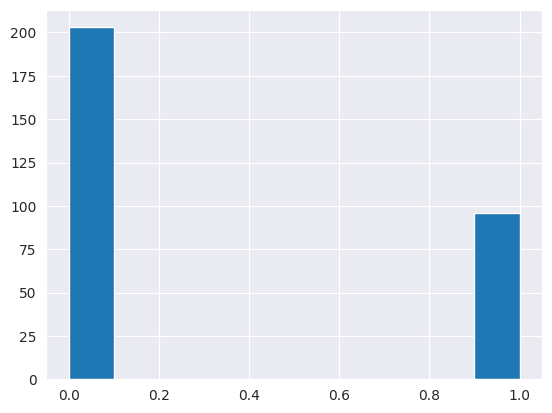

In [4]:
data['DEATH_EVENT'].hist()

<Axes: >

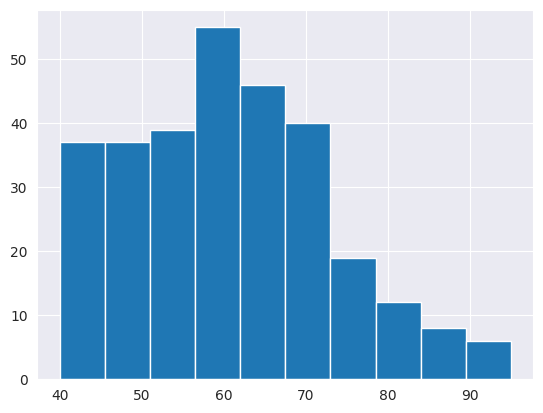

In [5]:
data['age'].hist()

<Axes: >

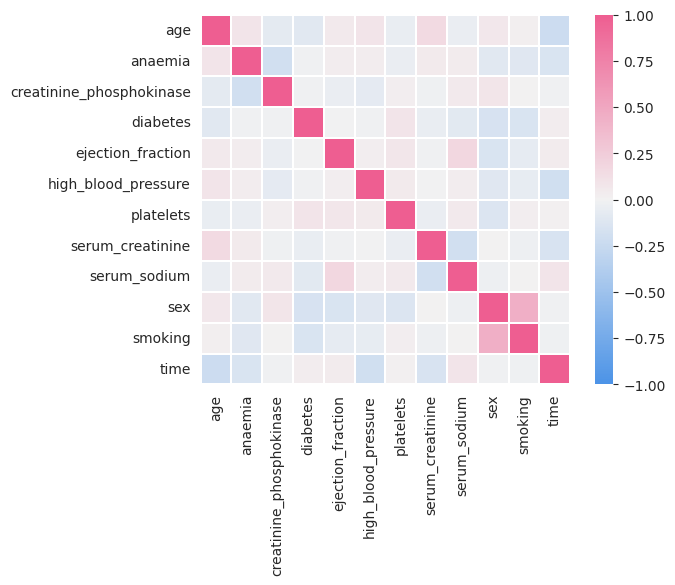

In [6]:
corelation = data.iloc[:, :-1].corr(method="pearson")
cmap = sns.diverging_palette(250, 354, 80, 60, center='light', as_cmap=True)
sns.heatmap(corelation, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=0.2)

In [18]:
data = data[
    [
        'age',
        'anaemia',
        'creatinine_phosphokinase',
        'diabetes',
        'ejection_fraction',
        'high_blood_pressure',
        'platelets',  # Correct the typo here
        'serum_creatinine',
        'serum_sodium',
        'smoking',
        'time',
        'DEATH_EVENT'
    ]
]
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,10,1


<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

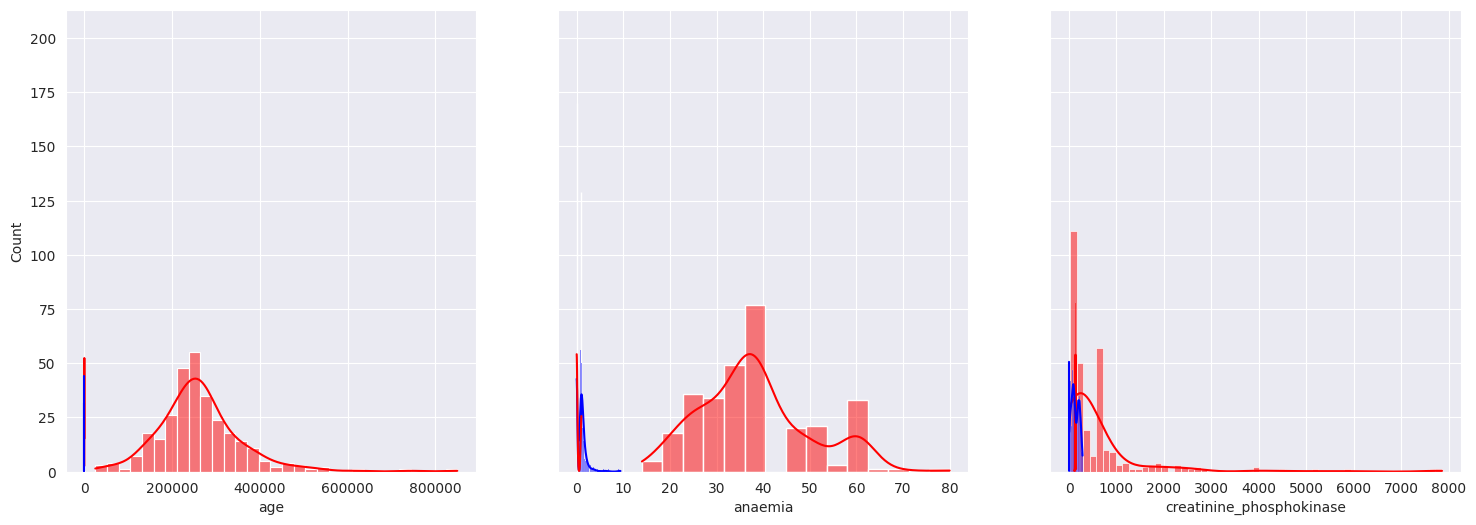

In [19]:
fig, axes = plt.subplots(1, 3, figsize= (18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="age", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="anaemia", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="creatinine_phosphokinase", kde=True, color='r')
sns.histplot(data, ax=axes[0], x="diabetes", kde=True, color='b')
sns.histplot(data, ax=axes[1], x="ejection_fraction", kde=True, color='r')
sns.histplot(data, ax=axes[2], x="high_blood_pressure", kde=True, color='b')
sns.histplot(data, ax=axes[0], x="platelets", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="serum_creatinine", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="serum_sodium", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="smoking", kde=True, color='r')
sns.histplot(data, ax=axes[2], x="time", kde=True, color='b')

In [20]:
x=data.drop(['DEATH_EVENT'], axis=1)
y=data['DEATH_EVENT']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

0.7333333333333333


<Axes: >

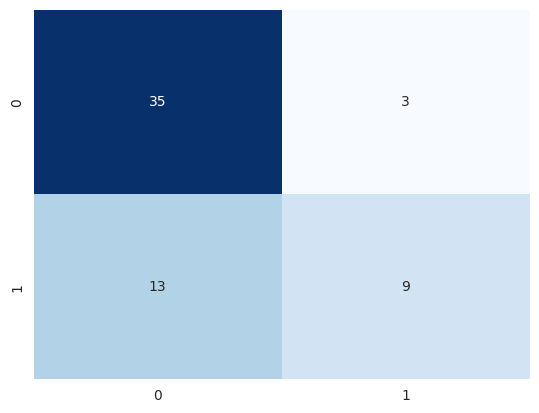

In [23]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
mtx = confusion_matrix(y_test, y_pred)
sns.heatmap(mtx, annot= True, fmt='d', cmap='Blues', cbar=False)


In [24]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.65


In [25]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.6333333333333333


In [26]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.65


In [27]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7166666666666667


*Discussions* :- Here, Naive Bayes algorithm is applied to the given dataset of heart_fail_clinical_records_datasets. As, from the co-relation heat-map, there is a strong co-relation between sex and smoking. so, we remove the feature 'sex' as in naive biase algorithm, every features should be independent. From the analysis of the histogram plot of every features, the optimal NB variant that is found is GaussianNB. In this type, we get the accuracy of 73% which is highest possible. After that, we used the MultinomialNB, BernouliNB, CategorigalNB, ComplementNB. Accuracy is quite good in the case of CategoricalNB. But Accuracy is quite low in the case of MultinomialNB, BernouliNB, ComplementNB.

strength of Naive Bayes:- It is very easy to implement and very simple.It is particularly efficient for large datasets, making it computationally inexpensive and fast.

weakness of Naive Bayes:- The accuracy is not so good. The assumption that features are independent may not hold true in many real-world scenarios. In practice, some features may be correlated, leading to a suboptimal model.If a particular feature in the test set has not been seen in the training set, the conditional probability for that feature becomes zero. This can cause issues.



                                                THE END